<a href="https://colab.research.google.com/github/usmang005/Deep-Learning-Models/blob/main/Food_Classification_(Pizza_%26_Steak).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with tensorflow

In [ ]:
# Import tensorflow
import tensorflow as tf

# check the version of the tensorflow
tf.__version__

'2.8.2'

### Get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-29 05:25:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.197.128, 173.194.198.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  81.0MB/s    in 1.3s    

2022-06-29 05:25:43 (81.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data (become one with data)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# The extra file in our pizza_steak irectory is ".&.."
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jun 29 05:25 .
drwxr-xr-x 1 root root 4096 Jun 29 05:25 ..
drwxr-xr-x 4 root root 4096 Jun 29 05:25 test
drwxr-xr-x 4 root root 4096 Jun 29 05:25 train


In [ ]:
# Another way to find out how man images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train") # giving the data directory where the dataset is stored
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created the class names from the sub directories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f" Image shape: {img.shape}") # Show the shape of the image
  return img

['864997.jpg']
 Image shape: (512, 512, 3)


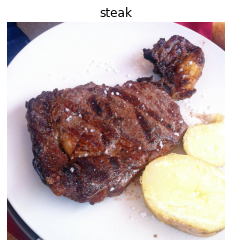

In [ ]:
# view a random image fom the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

In [ ]:
# Turn it into tensors
tf.constant(img)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  9,  25,  77],
        [  9,  25,  76],
        [  8,  24,  75],
        ...,
        [235, 176, 118],
        [237, 176, 119],
        [235, 175, 115]],

       [[  4,  20,  71],
        [  3,  19,  70],
        [  2,  18,  69],
        ...,
        [244, 189, 133],
        [246, 191, 134],
        [245, 190, 133]],

       [[  8,  24,  75],
        [  4,  20,  71],
        [  1,  17,  66],
        ...,
        [237, 185, 128],
        [238, 188, 129],
        [238, 188, 129]],

       ...,

       [[ 99,  48,  31],
        [ 99,  50,  33],
        [106,  57,  40],
        ...,
        [243, 242, 247],
        [243, 242, 247],
        [243, 242, 247]],

       [[104,  51,  33],
        [115,  64,  45],
        [120,  69,  50],
        ...,
        [244, 243, 248],
        [243, 242, 247],
        [242, 241, 246]],

       [[ 99,  46,  28],
        [116,  63,  45],
        [117,  64,  46],
        ...,
        [244, 243, 24

In [ ]:
# view the image shape
img.shape # returns width, height of the image

(512, 512, 3)

# Scalling (Normalizing the data) the dataset

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.03529412, 0.09803922, 0.30196078],
        [0.03529412, 0.09803922, 0.29803922],
        [0.03137255, 0.09411765, 0.29411765],
        ...,
        [0.92156863, 0.69019608, 0.4627451 ],
        [0.92941176, 0.69019608, 0.46666667],
        [0.92156863, 0.68627451, 0.45098039]],

       [[0.01568627, 0.07843137, 0.27843137],
        [0.01176471, 0.0745098 , 0.2745098 ],
        [0.00784314, 0.07058824, 0.27058824],
        ...,
        [0.95686275, 0.74117647, 0.52156863],
        [0.96470588, 0.74901961, 0.5254902 ],
        [0.96078431, 0.74509804, 0.52156863]],

       [[0.03137255, 0.09411765, 0.29411765],
        [0.01568627, 0.07843137, 0.27843137],
        [0.00392157, 0.06666667, 0.25882353],
        ...,
        [0.92941176, 0.7254902 , 0.50196078],
        [0.93333333, 0.7372549 , 0.50588235],
        [0.93333333, 0.7372549 , 0.50588235]],

       ...,

       [[0.38823529, 0.18823529, 0.12156863],
        [0.38823529, 0.19607843, 0.12941176],
        [0.41568627, 0

## An end - to end example of CNN
* Load our images
* Preprocess our images
* Buil a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random_seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called as nomalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory= test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = "relu",
                         input_shape = (224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

# 3. Fit the model
history_1 = model_1.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 213ms/step - loss: 0.5704 - accuracy: 0.6827 - val_loss: 0.3790 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4340 - accuracy: 0.8080 - val_loss: 0.3668 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4129 - accuracy: 0.8267 - val_loss: 0.3968 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3739 - accuracy: 0.8413 - val_loss: 0.3223 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3343 - accuracy: 0.8580 - val_loss: 0.3728 - val_accuracy: 0.8360


In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 3s 185ms/step - loss: 0.3728 - accuracy: 0.8360


[0.3727944493293762, 0.8360000252723694]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Using the same model as before
ANN

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(10, activation = "relu"),
          tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the mode
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_2.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 9s 185ms/step - loss: 2.0666 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6933 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6935 - accuracy: 0.4693 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2. summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 602,197
Trainable params: 602,197
Non-trainable params: 0
_________________________________________________________________


### Binary Classification: Breakdown

1. Become one with data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfaction (experiment, experiment, experiment)

### 1. Become one with the data

['3094354.jpg']
 Image shape: (512, 512, 3)
['714991.jpg']
 Image shape: (512, 512, 3)


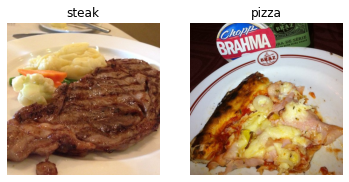

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (Prepare it for the model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn it into **Batches**

In [ ]:
# Create train and test dta generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [ ]:
# Load in our image data from directories and turn them into the batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a saple of a train data batch
images, labels = train_data.next() # Get the "next batch" of images
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.01568628, 0.03529412, 0.01176471],
          [0.01568628, 0.03529412, 0.01176471],
          [0.02745098, 0.03529412, 0.01568628],
          ...,
          [0.03137255, 0.03921569, 0.01960784],
          [0.03529412, 0.04313726, 0.02352941],
          [0.03529412, 0.04313726, 0.02352941]],
 
         [[0.01568628, 0.03529412, 0.01176471],
          [0.01568628, 0.03529412, 0.01176471],
          [0.02352941, 0.03137255, 0.01176471],
          ...,
          [0.03529412, 0.04313726, 0.02352941],
          [0.03529412, 0.04313726, 0.02352941],
          [0.03137255, 0.03921569, 0.01960784]],
 
         [[0.01960784, 0.03921569, 0.01568628],
          [0.02745098, 0.03529412, 0.01568628],
          [0.03529412, 0.04313726, 0.02352941],
          ...,
          [0.04705883, 0.0509804 , 0.03137255],
          [0.04313726, 0.04705883, 0.02745098],
          [0.04705883, 0.0509804 , 0.03137255]],
 
         ...,
 
         [[0.93725497, 0.9490197 , 0.9058824 ],
          [0.94509

Text(0.5, 1.0, '1.0')

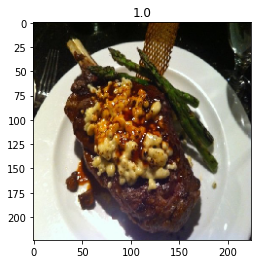

In [ ]:
plt.imshow(images[0])
plt.title(labels[0])

### 3. Create a CNN model (start with a baseline)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (This will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           padding = "valid",
           strides = 1,
           activation = "relu",
           input_shape= (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])



In [ ]:
#3. Compile the model
model_4. compile(loss = "binary_crossentropy",
                 optimizer = Adam(),
                 metrics =["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 1.1415 - accuracy: 0.6753 - val_loss: 0.4353 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4327 - accuracy: 0.8020 - val_loss: 0.3774 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.2973 - accuracy: 0.8800 - val_loss: 0.3902 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.1475 - accuracy: 0.9493 - val_loss: 0.4412 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0471 - accuracy: 0.9900 - val_loss: 0.6051 - val_accuracy: 0.7920


### 5. Evaluating our model

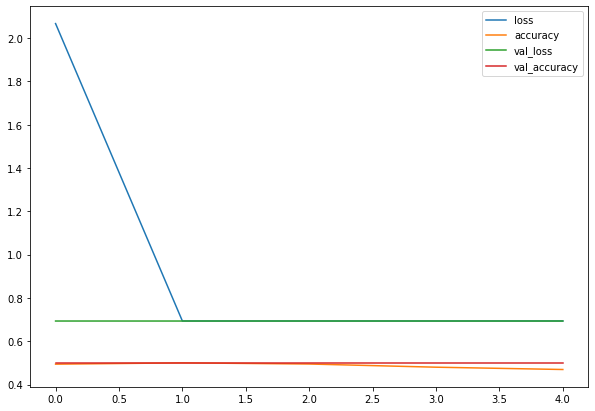

In [ ]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

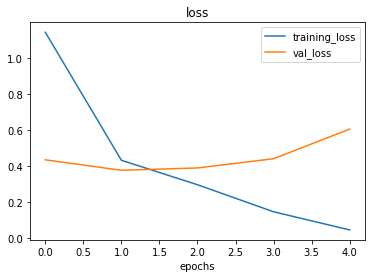

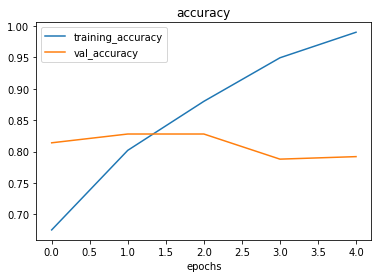

In [ ]:
# check out the loss an accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size = 2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size = 2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])


In [ ]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics =["accuracy"])

In [ ]:
# Fit the model
history_6 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 188ms/step - loss: 0.5966 - accuracy: 0.6760 - val_loss: 0.4500 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4873 - accuracy: 0.7733 - val_loss: 0.4070 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4391 - accuracy: 0.7933 - val_loss: 0.3913 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4225 - accuracy: 0.8107 - val_loss: 0.3643 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3821 - accuracy: 0.8360 - val_loss: 0.3353 - val_accuracy: 0.8600


In [ ]:
# Get a summary of model_5
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)  

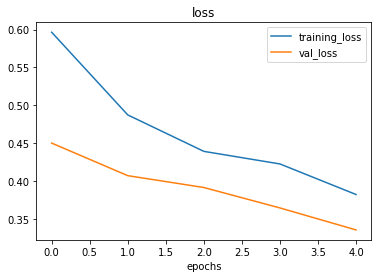

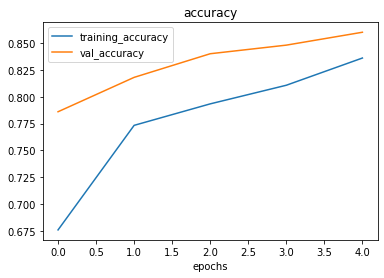

In [ ]:
# Plot loss curves
plot_loss_curves(history = history_6)

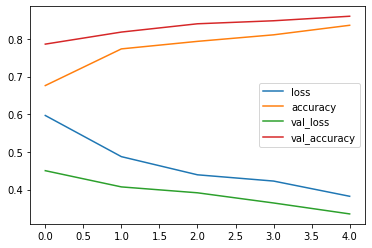

In [ ]:
pd.DataFrame(history_6.history).plot()

### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentaion for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode ="binary",
                                                                   shuffle = False)
# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size =32,
                                               class_mode ="binary",
                                               shuffle = False)

# Create non augmented test data batches
print("Non-augmented test dasta: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test dasta: 
Found 500 images belonging to 2 classes.


In [ ]:
# Visuaize some Augmented data

# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 20


(-0.5, 223.5, 223.5, -0.5)

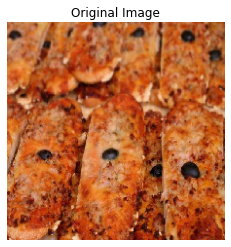

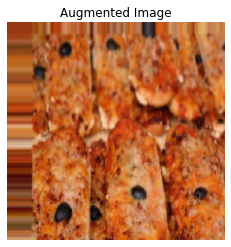

In [ ]:
# Show original and augmented image
random_number = random.randint(0, 32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)  

In [ ]:
# Creat a model 6 to train on our augmented data
model_6 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size = 2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

In [ ]:
# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model on our augmented data
history_7 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 477ms/step - loss: 0.7253 - accuracy: 0.4400 - val_loss: 0.6905 - val_accuracy: 0.5620
Epoch 2/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6901 - accuracy: 0.5573 - val_loss: 0.6641 - val_accuracy: 0.6820
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6681 - accuracy: 0.6553 - val_loss: 0.6314 - val_accuracy: 0.6400
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6216 - accuracy: 0.6900 - val_loss: 0.5366 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5713 - accuracy: 0.7373 - val_loss: 0.5379 - val_accuracy: 0.6800


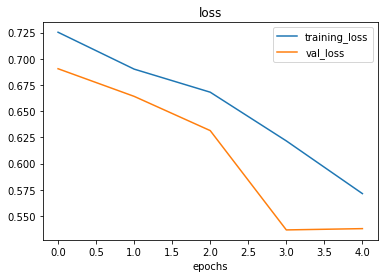

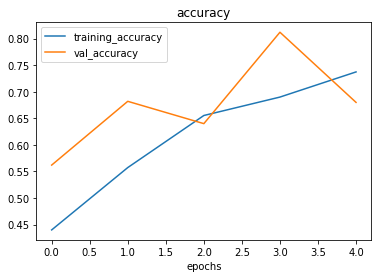

In [ ]:
# Plot training curve of model 6
plot_loss_curves(history_7)

In [ ]:
# Create the augmented data again with the shuffling of data
train_datagen_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                               target_size = (224, 224),
                                                                               class_mode = "binary",
                                                                               batch_size = 32,
                                                                               shuffle = True) # Shuffle data this time


Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model same as model 5 & 6
model_7 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_8 = model_7.fit(train_datagen_augmented_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_datagen_augmented_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6436 - accuracy: 0.6187 - val_loss: 0.4947 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5418 - accuracy: 0.7380 - val_loss: 0.4178 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4999 - accuracy: 0.7660 - val_loss: 0.3729 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4653 - accuracy: 0.7787 - val_loss: 0.3717 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4761 - accuracy: 0.7793 - val_loss: 0.3389 - val_accuracy: 0.8700


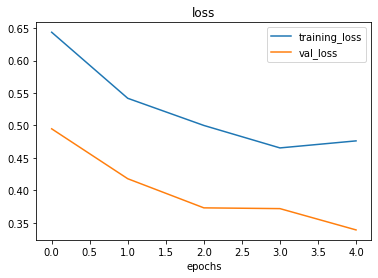

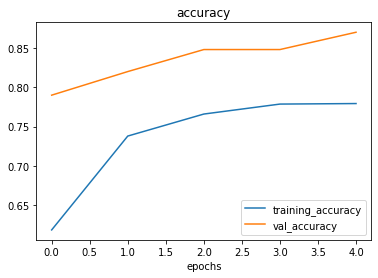

In [ ]:
# Plot the training curves
plot_loss_curves(history_8)

### Repeat until satisfied

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Create a model tiny vgg
model_8 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

# Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])
# Fit the model on augmented and shuffled data
history_9 = model_8.fit(train_datagen_augmented_shuffled,
                        epochs= 10,
                        steps_per_epoch = len(train_datagen_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Epoch 1/10
47/47 [==============================] - 23s 480ms/step - loss: 0.6600 - accuracy: 0.5940 - val_loss: 0.4889 - val_accuracy: 0.7880
Epoch 2/10
47/47 [==============================] - 22s 476ms/step - loss: 0.5461 - accuracy: 0.7353 - val_loss: 0.4284 - val_accuracy: 0.8300
Epoch 3/10
47/47 [==============================] - 22s 476ms/step - loss: 0.4964 - accuracy: 0.7793 - val_loss: 0.4159 - val_accuracy: 0.8200
Epoch 4/10
47/47 [==============================] - 22s 476ms/step - loss: 0.4917 - accuracy: 0.7633 - val_loss: 0.4129 - val_accuracy: 0.8300
Epoch 5/10
47/47 [==============================] - 22s 475ms/step - loss: 0.4960 - accuracy: 0.7713 - val_loss: 0.3381 - val_accuracy: 0.8600
Epoch 6/10
47/47 [==============================] - 22s 476ms/step - loss: 0.4824 - accuracy: 0.7700 - val_loss: 0.3595 - val_accuracy: 0.8480
Epoch 7/10
47/47 [==============================] - 22s 473ms/step - loss: 0.4643 - accuracy: 0.7807 - val_loss: 0.3416 - val_accuracy: 0.8480

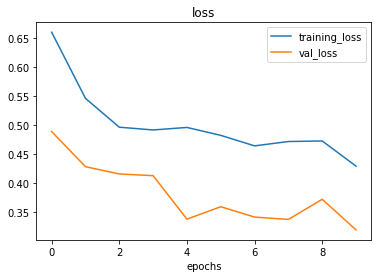

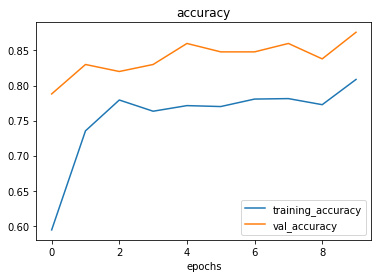

In [ ]:
plot_loss_curves(history_9)

In [ ]:
# Dwonloading our custom image to predict on
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
steak

--2022-06-29 05:37:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-06-29 05:37:02 (34.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
steak.dtype

dtype('uint8')

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
tf.constant(steak)

<tf.Tensor: shape=(4032, 3024, 3), dtype=uint8, numpy=
array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 

(-0.5, 3023.5, 4031.5, -0.5)

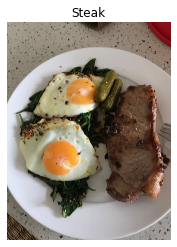

In [ ]:
# Show the image
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.title("Steak")
plt.axis(False)

In [ ]:
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 conv2d_17 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 conv2d_19 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                 

In [ ]:
model_8.evaluate(test_data)

16/16 [==============================] - 2s 136ms/step - loss: 0.3195 - accuracy: 0.8760


[0.3195074796676636, 0.8759999871253967]

(-0.5, 3023.5, 4031.5, -0.5)

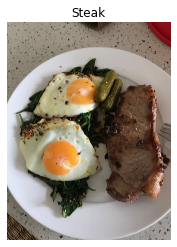

In [ ]:
plt.imshow(steak)
plt.title("Steak")
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
tf.expand_dims(steak, axis = 0)

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 127, 100],
         [149, 127, 103],
         [114,  

In [ ]:
# Createa function to imoprt an image and resize it to be ableto be used with our model
def load_and_prep(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into  tensor and reshape it to (img_shape,img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read_file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize (img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 an 1 )
  img = img/255.
  return img


In [ ]:
steak = load_and_prep("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Make a prediction
pred = model_7.predict(tf.expand_dims(steak, axis = 0))

In [ ]:
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, None, None, 10)  

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class


'steak'

In [ ]:
def prep_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

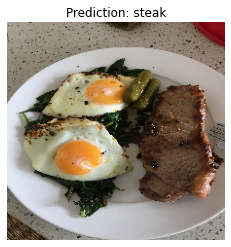

In [ ]:
# Test our model on a custom image
prep_and_plot(model_7, "03-steak.jpeg")

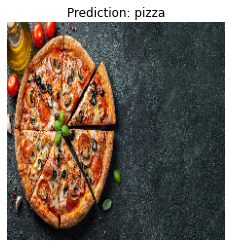

In [ ]:
prep_and_plot(model_7, "pizza-image.jpg")

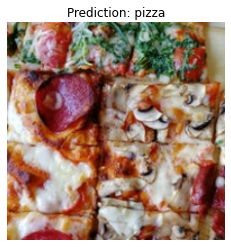

In [ ]:
prep_and_plot(model_7, "pizza-image1.jpg")

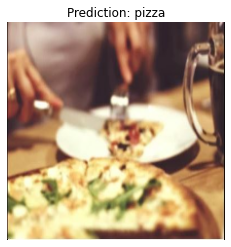

In [ ]:
prep_and_plot(model_7, "pizza-blur.JPG")

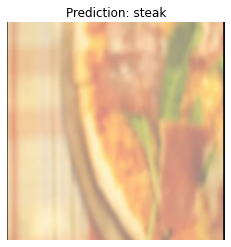

In [ ]:
prep_and_plot(model_7, "pizza-blur1.JPG")

In [ ]:
!nvidia-smi

Wed Jun 29 05:38:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    28W /  70W |   2840MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.2 kB/s 
     |████████████████████████████████| 438 kB 48.8 MB/s 
     |████████████████████████████████| 5.8 MB 641 kB/s 
     |████████████████████████████████| 1.6 MB 50.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

### 10 Class data (Multiclass Image Classification)

In [ ]:
# Download the Dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-06-29 05:39:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   158MB/s    in 3.1s    

2022-06-29 05:39:46 (158 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Extract all the data in one folder
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
# Unzip the data
zip_ref.extractall()
# Closing after extracting the all files
zip_ref.close()

### Becoming one with the data

In [ ]:
import os

# Walk through 10 classes o food image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 10 directories and 0 images in 10_fo

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2953950.jpg']
 Image shape: (512, 512, 3)


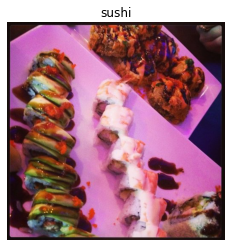

In [ ]:
# Visualize, Visualize, Visualize
import random
img = view_random_image(target_dir= train_dir,
                        target_class = random.choice(class_names))

In [ ]:
# Randomly picking up the labels
random.choice(class_names)

'chicken_wings'

### 2. Preprocess the data ( prepare it for a model )


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in form directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size= (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model ( Stat with the baseline )

In [ ]:
# 1. Create the model
model_9 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = "softmax")

])

# 2. Compile the model
model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )

# 3. Fit the model
history_10 = model_9.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = test_data,
                         validation_steps = len(test_data)
                         )

Epoch 1/5
235/235 [==============================] - 57s 239ms/step - loss: 2.1647 - accuracy: 0.2060 - val_loss: 2.0033 - val_accuracy: 0.2828
Epoch 2/5
235/235 [==============================] - 57s 242ms/step - loss: 1.8907 - accuracy: 0.3403 - val_loss: 1.9150 - val_accuracy: 0.3236
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 1.4761 - accuracy: 0.4989 - val_loss: 2.0071 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 67s 284ms/step - loss: 0.8282 - accuracy: 0.7340 - val_loss: 2.5944 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 54s 232ms/step - loss: 0.2943 - accuracy: 0.9101 - val_loss: 3.7293 - val_accuracy: 0.2712


### 4. Evaluate the model

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 149ms/step - loss: 3.7293 - accuracy: 0.2712


[3.7293379306793213, 0.2712000012397766]

### Let's use the data augmentation to overcome the overfitting of the model

In [ ]:
# Create ImageDAtaGenerator training instances with data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  width_shift_range= 0.2,
                                  height_shift_range = 0.2,
                                  horizontal_flip = True)

# Test data
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode ="binary",
                                                                   shuffle = False)
# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size =32,
                                               class_mode ="binary",
                                               shuffle = False)

# Create non augmented test data batches
print("Non-augmented test dasta: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "binary")

In [ ]:
# Import data and augment it from training directory
print("Augmented Training data")
train_datagen = train_datagen.flow_from_directory(train_dir,
                                                  target_size = (224, 224),
                                                  batch_size= 32,
                                                  class_mode ="categorical",
                                                  shuffle = True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size= (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Augmented Training data
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_9.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 conv2d_21 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 conv2d_23 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                 

In [ ]:
# Create a model and use it on the augmented data to reduce overfitting on the training data
model_10 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation= "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = "softmax")
])

# Compile the model
model_10.compile(loss = "categorical_crossentropy",
                 optimizer  = Adam(),
                 metrics = ["accuracy"])

# Fit the model on the augmentedn data
history_11 = model_10.fit(train_datagen,
                          epochs = 5,
                          steps_per_epoch = len(train_datagen),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 480ms/step - loss: 2.1951 - accuracy: 0.1892 - val_loss: 2.0836 - val_accuracy: 0.2544
Epoch 2/5
235/235 [==============================] - 113s 482ms/step - loss: 2.0925 - accuracy: 0.2491 - val_loss: 1.9431 - val_accuracy: 0.3272
Epoch 3/5
235/235 [==============================] - 111s 474ms/step - loss: 1.9913 - accuracy: 0.2989 - val_loss: 1.8152 - val_accuracy: 0.3816
Epoch 4/5
235/235 [==============================] - 112s 475ms/step - loss: 1.9317 - accuracy: 0.3287 - val_loss: 1.8453 - val_accuracy: 0.3488
Epoch 5/5
235/235 [==============================] - 113s 483ms/step - loss: 1.8993 - accuracy: 0.3401 - val_loss: 1.7568 - val_accuracy: 0.3892


In [ ]:
}